In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch
from sklearn import metrics
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Applied-Artificial-Intelligence-Workshop/master/Datasets/winequality-red.csv'
df = pd.read_csv(file_url,sep=';')
features = df.drop('quality', 1)
label = df['quality']
scaled_features = preprocessing.scale(features)

In [2]:
mean_shift_model = MeanShift()
mean_shift_model.fit(scaled_features)
label_mean_shift = mean_shift_model.labels_
n_cluster_mean_shift = len(mean_shift_model.cluster_centers_)

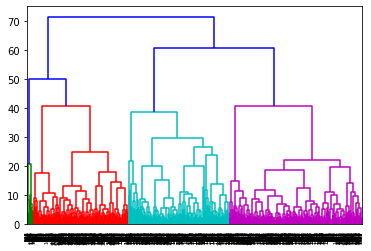

In [3]:
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
agglomerative_model = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
agglomerative_model.fit(scaled_features)
label_agglomerative = agglomerative_model.labels_

In [4]:
ARI_mean=metrics.adjusted_rand_score(label, label_mean_shift)
ARI_agg=metrics.adjusted_rand_score(label, label_agglomerative)
AMI_mean=metrics.adjusted_mutual_info_score(label, label_mean_shift)
AMI_agg=metrics.adjusted_mutual_info_score(label, label_agglomerative)
V_mean=metrics.v_measure_score(label, label_mean_shift, beta=1)
V_agg=metrics.v_measure_score(label, label_agglomerative, beta=1)
FM_mean=metrics.fowlkes_mallows_score(label, label_mean_shift)
FM_agg=metrics.fowlkes_mallows_score(label, label_agglomerative)

/Users/williamso/.local/share/virtualenvs/The-Applied-Artificial-Intelligence-Worksh-opjkLrgv/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/williamso/.local/share/virtualenvs/The-Applied-Artificial-Intelligence-Worksh-opjkLrgv/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [5]:
Sil_mean=metrics.silhouette_score(scaled_features, label_mean_shift)
Sil_agg=metrics.silhouette_score(scaled_features, label_agglomerative)
CH_mean=metrics.calinski_harabasz_score(scaled_features, label_mean_shift)
CH_agg=metrics.calinski_harabasz_score(scaled_features, label_agglomerative)
DB_mean=metrics.davies_bouldin_score(scaled_features, label_mean_shift)
DB_agg=metrics.davies_bouldin_score(scaled_features, label_agglomerative)